<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Python-for-Remote-Sensing/blob/master/ASCAT_L2_Surface_Wind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install netcdf4
!apt-get -qq install python-cartopy python3-cartopy

In [0]:
import netCDF4 as nc
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

In [0]:
pathname = '/content/'
filename1 = 'subsetted-ascat_20190811_134200_metopb_35786_eps_o_coa_3201_ovw.l2.nc'
filename2 = 'subsetted-ascat_20190807_233300_metopb_35735_eps_o_250_3201_ovw.l2.nc'

dataset = nc.Dataset(pathname+filename1)
dset = nc.Dataset(pathname+filename2)

In [0]:
print(dset)
print('//////////////////////////////////////////')
print(dset.variables['wind_speed'])

In [0]:
ascatWindSpeed1 = np.array(dataset.variables['wind_speed'])
ascatWindSpeed1[ascatWindSpeed1 == -32767] = np.nan
ascatWindDir1 = np.array(dataset.variables['wind_dir'])
ascatWindDir1[ascatWindDir1 == -32767] = np.nan
lat1 = np.array(dataset.variables['lat'])
lon1 = np.array(dataset.variables['lon'])

ascatWindSpeed2 = np.array(dset.variables['wind_speed'])
ascatWindSpeed2[ascatWindSpeed2 == -32767] = np.nan
ascatWindDir2 = np.array(dset.variables['wind_dir'])
ascatWindDir2[ascatWindDir2 == -32767] = np.nan
lat2 = np.array(dset.variables['lat'])
lon2 = np.array(dset.variables['lon'])

In [0]:
def wind_components(wSpeed, wDir, knots=False):
  '''
  Function to calculate u, v components of wind direction based
  on wind speed. It can also compute them in Knots.
  '''
  import numpy as np
  
  if knots:
    # obtain wind speed in Knots
    u = -wSpeed*np.sin(wDir * np.pi/180)*1.9438
    v = -wSpeed*np.cos(wDir * np.pi/180)*1.9438
  else:
    # wind speed is obtained in default (m/s^-1)
    u = -wSpeed*np.sin(wDir * np.pi/180)
    v = -wSpeed*np.cos(wDir * np.pi/180)

  return u, v

In [0]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Draw Wind Speed Data
carto_map = ax.contourf(lon1, lat1, ascatWindSpeed1, 100, 
                        transform=ccrs.PlateCarree(), 
                        cmap='jet')

title = dataset.title
ax.set_title(title,
             fontsize=16,
             fontweight='bold',
             loc='left')

# Mask land regions and coastlines
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face', facecolor='w'))
ax.coastlines(resolution='50m', linewidth=1, color='black') # , 

# Colorbar
cbar = plt.colorbar(carto_map, shrink=0.42)
cbar.set_label('SAR Wind Speed [m.s-1]',
               fontsize=15, 
               labelpad=25)

# Draw wind speed vectors
dx = (-ascatWindSpeed1)*np.sin(ascatWindDir1 * np.pi / 180)  # u
dy = (-ascatWindSpeed1)*np.cos(ascatWindDir1 * np.pi / 180)  # v
q = ax.quiver(lon1, lat1, dx, dy, color="black")
qk = ax.quiverkey(q, 1.07, 1.02, 10, r'$10  \frac{m}{s}$', labelpos='E')


# Draw gridlines and lat lon ticks on the axis
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.8, linestyle=':')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}
gl.ylabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}


In [0]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Draw Wind Speed Data as filled contours
carto_map = ax.contourf(lon2, lat2, ascatWindSpeed2, 100, 
                        transform=ccrs.PlateCarree(), 
                        cmap='jet')

title = dset.title
ax.set_title(title,
             fontsize=16,
             fontweight='bold',
             loc='left')

# Mask land regions and coastlines
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face', facecolor='w'))
ax.coastlines(resolution='50m', linewidth=1, color='black') # , 

# Colorbar
cbar = plt.colorbar(carto_map, shrink=0.42)
cbar.set_label('SAR Wind Speed [m.s-1]',
               fontsize=15, 
               labelpad=25)

# Draw wind speed vectors
dx = (-ascatWindSpeed2)*np.sin(ascatWindDir2 * np.pi / 180)  # u
dy = (-ascatWindSpeed2)*np.cos(ascatWindDir2 * np.pi / 180)  # v
q = ax.quiver(lon2, lat2, dx, dy, color="black")
qk = ax.quiverkey(q, 1.07, 1.02, 10, r'$10  \frac{m}{s}$', labelpos='E')

# Draw contours
CS = ax.contour(lon2, lat2, ascatWindSpeed2, levels=10, 
           colors='k', linewidths=0.7, linestyles='dashed') # cmap='YlOrRd'
ax.clabel(CS, fontsize=5, colors='k', inline=1, 
          rightside_up=True, use_clabeltext=True)
# , inline_spacing=10


# Draw gridlines and lat lon ticks on the axis
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.8, linestyle=':')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}
gl.ylabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}

In [0]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Draw Wind Speed Data
carto_map = ax.contourf(lon2, lat2, ascatWindSpeed2*1.944, 100, 
                        transform=ccrs.PlateCarree(), 
                        cmap='YlOrRd')

title = dset.title
ax.set_title(title,
             fontsize=16,
             fontweight='bold',
             loc='left')
# ax.set_title('500-hPa Height, Wind (kts),' + 
#              'Absolute Vorticity ($10^{-5} s^{-1}$)\n 1993-03-14 12UTC',
#              fontsize=14)

# Mask land regions and coastlines
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face', facecolor='w'))
ax.coastlines(resolution='50m', linewidth=1, color='black') # , 

# Colorbar
cbar = plt.colorbar(carto_map, shrink=0.42)
cbar.set_label('ASCAT Wind Speed [m.s-1]',
               fontsize=15, 
               labelpad=25)

# Draw wind speed vectors
dx = (-ascatWindSpeed2)*np.sin(ascatWindDir2 * np.pi / 180)*1.944  # u in Knots
dy = (-ascatWindSpeed2)*np.cos(ascatWindDir2 * np.pi / 180)*1.944  # v in Knots
# q = ax.quiver(lon2, lat2, dx, dy, color="black")
# qk = ax.quiverkey(q, 1.07, 1.02, 10, r'$10  \frac{m}{s}$', labelpos='E')
ax.barbs(lon2, lat2, dx, dy, length=5, alpha=0.6, 
         sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=1.15, transform=ccrs.PlateCarree()) 
# rounding=False,

# Draw gridlines and lat lon ticks on the axis
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.8, linestyle=':')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}
gl.ylabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


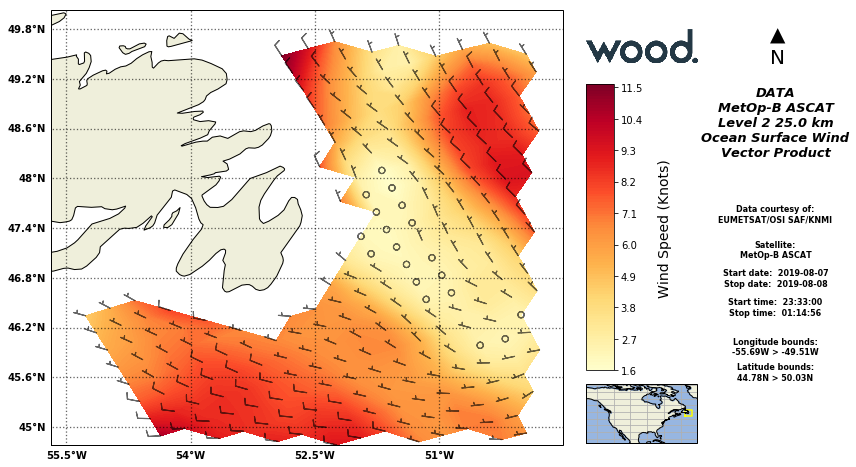

In [0]:
dx, dy = wind_components(ascatWindSpeed2, ascatWindDir2, knots=True)

def make_blnk(ax):
  ax.yaxis.set_ticks_position('none')
  ax.xaxis.set_ticks_position('none')
  ax.tick_params(labelbottom='off', labeltop='off', 
                 labelleft='off', labelright='off' ,
                 bottom='off', top='off', left='off', right='off' )
  
def clear_spine(ax):
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  
#    ############################# Define Grid #################################
plt.figure(figsize=(14, 8))
ax1 = plt.subplot2grid((6, 6), (0, 0), colspan=4, rowspan=6,
                       projection=ccrs.PlateCarree())
ax2 = plt.subplot2grid((6, 6), (0, 4), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((6, 6), (1, 5), colspan=1, rowspan=5)
ax4 = plt.subplot2grid((6, 6), (1, 4), colspan=1, rowspan=4)
ax5 = plt.subplot2grid((6, 6), (5, 4), colspan=1, rowspan=1,
                       projection=ccrs.PlateCarree())
ax6 = plt.subplot2grid((6, 6), (0, 5), colspan=1, rowspan=1)
make_blnk(ax1), make_blnk(ax2), make_blnk(ax3),
make_blnk(ax4), make_blnk(ax5), make_blnk(ax6)
#    ############################# Main Map ####################################
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                             edgecolor='face', 
                                             facecolor=cfeature.COLORS['land']))
carto_map = ax1.contourf(lon2, lat2, ascatWindSpeed2*1.944, 100, 
                        transform=ccrs.PlateCarree(), 
                        cmap='YlOrRd', zorder=2)
ax1.coastlines(resolution='50m', linewidth=1, color='black')
ax1.barbs(lon2, lat2, dx, dy, length=5, alpha=0.6, 
         sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
         linewidth=1.15, transform=ccrs.PlateCarree(), zorder=3)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=1.3, color='black', alpha=0.6, linestyle=':')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}
gl.ylabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}
#    ########################## Company Logo ###################################
logo = image.imread('/content/Wood-Primary-Logo-Transparent.jpg')
ax2.imshow(logo[70:200, :])
clear_spine(ax2)
#    ############################## Colorbar ###################################
from mpl_toolkits.axes_grid1 import make_axes_locatable
clear_spine(ax4)
cax = make_axes_locatable(ax4).append_axes('left', size='35%', pad=0.05)
cbar = plt.colorbar(carto_map, cax=cax)
cbar.set_label('Wind Speed (Knots)', fontsize=14, labelpad=15)
#    ############################ Locating Map #################################
ax5.set_extent((-145, -45, 20, 65))
ax5.coastlines(resolution='110m', zorder=2)
ax5.add_feature(cfeature.LAND)
ax5.add_feature(cfeature.OCEAN)
ax5.gridlines()
lon0,lon1,lat0,lat1 = ax1.get_extent()
box_x = [lon0, lon1, lon1, lon0, lon0]
box_y = [lat0, lat0, lat1, lat1, lat0]
ax5.plot(box_x, box_y, color='yellow',  transform=ccrs.Geodetic())
#    ############################## North Arrow ################################
ax6.text(0.55, 0.15,u'\u25B2 \nN ', ha='center', fontsize=20, 
         family='Arial', rotation = 0)
clear_spine(ax6)
#    ############################## Information ################################
clear_spine(ax3)

from textwrap import wrap
ax3.text(0.5, 0.80,'DATA\n'+"\n".join(wrap(dset.title, 18)), wrap=True,
         style='oblique', ha='center', fontsize=13, weight='bold')

ax3.text(0.5, 0.62,'Data courtesy of:\n'+dset.institution,
         ha='center', fontsize=8, weight='bold')
ax3.text(0.5, 0.52,'Satellite:\n'+dset.source,
         ha='center', fontsize=8, weight='bold')
ax3.text(0.5, 0.47,'Start date:  '+dset.start_date,
         ha='center', fontsize=8, weight='bold')
ax3.text(0.5, 0.44,'Stop date:  '+dset.stop_date,
         ha='center', fontsize=8, weight='bold')
ax3.text(0.5, 0.39,'Start time:  '+dset.start_time,
         ha='center', fontsize=8, weight='bold')
ax3.text(0.5, 0.36,'Stop time:  '+dset.stop_time,
         ha='center', fontsize=8, weight='bold')
ax3.text(0.5, 0.25,'Longitude bounds:\n{0}W > {1}W'.
         format(round(lon0,2), round(lon1,2)),
         ha='center', fontsize=8, weight='bold')
ax3.text(0.5, 0.18,'Latitude bounds:\n{0}N > {1}N'.
         format(round(lat0, 2), round(lat1, 2)),
         ha='center', fontsize=8, weight='bold')
#    ###########################################################################
plt.show()

In [0]:
# >>> This part is not required since we are going to only work with 
# >>> Newfoundland data subsets

# filename3 = 'ascat_20140115_015752_metopa_37568_eps_o_coa_ovw.l2.nc'
# data = nc.Dataset(pathname+filename3)

# ascat_WS = np.array(data.variables['wind_speed'])
# ascat_WS[ascat_WS == -32767] = np.nan
# ascat_WD = np.array(data.variables['wind_dir'])
# ascat_WD[ascat_WD == -32767] = np.nan
# latitude = np.array(data.variables['lat'])
# longitude = np.array(data.variables['lon'])

# # ################################################################
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection=ccrs.PlateCarree())
# # Draw Wind Speed Data
# carto_map = ax.contourf(longitude, latitude, ascat_WS, 100, 
#                         transform=ccrs.PlateCarree(), 
#                         cmap='jet')
# # Add title
# title = data.title
# ax.set_title(title,
#              fontsize=16,
#              fontweight='bold',
#              loc='left')
# # Mask land regions and coastlines
# ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
#                                             edgecolor='face', facecolor='w'))
# ax.coastlines(resolution='50m', linewidth=1, color='black') # , 
# # Colorbar
# cbar = plt.colorbar(carto_map, shrink=0.42)
# cbar.set_label('SAR Wind Speed [m.s-1]',
#                fontsize=15, 
#                labelpad=25)
# # Draw wind speed vectors
# # dx = (-ascat_WS)*np.sin(ascat_WD * np.pi / 180)  # u
# # dy = (-ascat_WS)*np.cos(ascat_WD * np.pi / 180)  # v
# # q = ax.quiver(longitude, latitude, dx, dy, color="black")
# # qk = ax.quiverkey(q, 1.07, 1.02, 10, r'$10  \frac{m}{s}$', labelpos='E')
# # Draw gridlines and lat lon ticks on the axis
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.8, linestyle=':')
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xlabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}
# gl.ylabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}

# **Trying to draw a complete map with GIS layouts.**

In [0]:
def blank_axes(ax):
  """
  blank_axes:  blank the extraneous spines and tick marks for an axes

  Input:
  ax:  a matplotlib Axes object

  Output: None
  """
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.yaxis.set_ticks_position('none')
  ax.xaxis.set_ticks_position('none')
  ax.tick_params(labelbottom='off', labeltop='off', 
                 labelleft='off', labelright='off' ,
                 bottom='off', top='off', left='off', right='off' )
    # end blank_axes

In [0]:
BORDERS2_10m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces',
                                            '10m', edgecolor='black',
                                            facecolor='none')
# """country boundaries.""""

LAND_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
# """land polygons, including major islands."""

RIVERS_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines',
                                          '10m', facecolor='none',
                                          edgecolor=cfeature.COLORS['water'])
# """single-line drainages, including lake centerlines."""

In [0]:
fig = plt.figure(figsize=(5, 7))

# ------------------------------- Surrounding frame ------------------------------
# set up frame full height, full width of figure, this must be called first

left = -0.05
bottom = -0.05
width = 1.1
height = 1.05
rect = [left,bottom,width,height]
ax3 = plt.axes(rect)

# turn on the spines we want, ie just the surrounding frame
blank_axes(ax3)
ax3.spines['right'].set_visible(True)
ax3.spines['top'].set_visible(True)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)

ax3.text(0.01,0.01,'© Don Cameron, 2017: net-analysis.com. ', fontsize=8)


# ---------------------------------  Main Map -------------------------------------
#
# set up main map almost full height (allow room for title), right 80% of figure

left = 0.2
bottom = 0
width = 0.8
height = 0.90
rect = [left,bottom,width,height]

ax = plt.axes(rect, projection=ccrs.PlateCarree(), )
ax.set_extent((150, 155, -30, -23))

ax.coastlines(resolution='10m', zorder=2)

#land polygons, including major islands, use cartopy default color
ax.add_feature(LAND_10m)
# ax.add_feature(RIVERS_10m)
ax.add_feature(BORDERS2_10m, edgecolor='grey')
# ax.stock_img()
# stock image is good enough for example, but OCEAN_10m could be used, but very slow
#       ax.add_feature(OCEAN_10m)

ax.gridlines(draw_labels=True, xlocs=[150, 152, 154, 155])


# -------------------------------- Title -----------------------------
# set up map title top 4% of figure, right 80% of figure

left = 0.2
bottom = 0.95
width = 0.8
height = 0.04
rect = [left,bottom,width,height]
ax6 = plt.axes(rect)
ax6.text(0.5, 0.0,'Multi-Axes Map Example', ha='center', fontsize=20)
blank_axes(ax6)


# ---------------------------------Locating Map ------------------------
#
# set up index map 20% height, left 16% of figure
left = 0
bottom = 0
width = 0.16
height = 0.2
rect = [left,bottom,width,height]

ax2 = plt.axes(rect, projection=ccrs.PlateCarree())
ax2.set_extent((110,160, -45, -10))
#  ax2.set_global()  will show the whole world as context

ax2.coastlines(resolution='110m', zorder=2)
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)

ax2.gridlines()

lon0,lon1,lat0,lat1 = ax.get_extent()
box_x = [lon0, lon1, lon1, lon0, lon0]
box_y = [lat0, lat0, lat1, lat1, lat0]

plt.plot(box_x, box_y, color='red',  transform=ccrs.Geodetic())


# ---------------------------------North Arrow  ----------------------------
#
left = 0
bottom = 0.2
width = 0.16
height = 0.2
rect = [left,bottom,width,height]
rect = [left,bottom,width,height]
ax4 = plt.axes(rect)

# need a font that support enough Unicode to draw up arrow. 
# need space after Unicode to allow wide char to be drawm?
ax4.text(0.5, 0.0,u'\u25B2 \nN ', ha='center', fontsize=30, 
         family='Arial', rotation = 0)
blank_axes(ax4)


# ------------------------------------  Legend -------------------------------------

# legends can be quite long, so set near top of map (0.4 - bottom + 0.5 height = 0.9 - near top)
left = 0
bottom = 0.4
width = 0.16
height = 0.5
rect = [left,bottom,width,height]
rect = [left,bottom,width,height]
ax5 = plt.axes(rect)
blank_axes(ax5)

**Mounting Google Drive on Colab to access all files simoltaneously.**

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')